# NLP and Topic Modeling - Watch Reviews

In this project, I will use unsupervised learning models to cluster the unlabeled documents of watch reviews into different groups. And then visualize the results and label them latent topic.

## Contents

* [Part 1: Load Data](#Part-1:-Load-Data)
* [Part 2: Tokenizing and Stemming](#Part-2:-Tokenizing-and-Stemming)
* [Part 3: TF-IDF](#Part-3:-TF-IDF)
* [Part 4: K-means clustering](#Part-4:-K-means-clustering)
* [Part 5: Topic Modeling - Latent Dirichlet Allocation](#Part-5:-Topic-Modeling---Latent-Dirichlet-Allocation)
* [Part 6: Optimal classify](#Part-6:-Optimal-Classify-)
* [Part 7: Analyze topic through the business lens](#Part-7:-Analyze-topic---through-the-business-lens)


# Part 1: Load Data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
# data Link: https://drive.google.com/file/d/192JMR7SIqoa14vrs7Z9BXO3iK89pimJL/view
id = "192JMR7SIqoa14vrs7Z9BXO3iK89pimJL"
file = drive.CreateFile({'id':id})
file.GetContentFile('watch_reviews.tsv')
watch_df = pd.read_csv('watch_reviews.tsv',  sep='\t', error_bad_lines=False)
watch_df.head()

<ipython-input-62-4aa1d761c0c0>:16: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  watch_df = pd.read_csv('watch_reviews.tsv',  sep='\t', error_bad_lines=False)
Skipping line 8704: expected 15 fields, saw 22
Skipping line 16933: expected 15 fields, saw 22
Skipping line 23726: expected 15 fields, saw 22

Skipping line 85637: expected 15 fields, saw 22

Skipping line 132136: expected 15 fields, saw 22
Skipping line 158070: expected 15 fields, saw 22
Skipping line 166007: expected 15 fields, saw 22
Skipping line 171877: expected 15 fields, saw 22
Skipping line 177756: expected 15 fields, saw 22
Skipping line 181773: expected 15 fields, saw 22
Skipping line 191085: expected 15 fields, saw 22
Skipping line 196273: expected 15 fields, saw 22
Skipping line 196331: expected 15 fields, saw 22

Skipping line 197000: expected 15 fields, saw 22
Skipping line 197011: expected 15 fields, saw 22
Skipping lin

marketplace  customer_id       review_id  product_id  product_parent  \
0          US      3653882  R3O9SGZBVQBV76  B00FALQ1ZC       937001370   
1          US     14661224   RKH8BNC3L5DLF  B00D3RGO20       484010722   
2          US     27324930  R2HLE8WKZSU3NL  B00DKYC7TK       361166390   
3          US      7211452  R31U3UH5AZ42LL  B000EQS1JW       958035625   
4          US     12733322  R2SV659OUJ945Y  B00A6GFD7S       765328221   

                                       product_title product_category  \
0  Invicta Women's 15150 "Angel" 18k Yellow Gold ...          Watches   
1  Kenneth Cole New York Women's KC4944 Automatic...          Watches   
2  Ritche 22mm Black Stainless Steel Bracelet Wat...          Watches   
3  Citizen Men's BM8180-03E Eco-Drive Stainless S...          Watches   
4  Orient ER27009B Men's Symphony Automatic Stain...          Watches   

   star_rating  helpful_votes  total_votes vine verified_purchase  \
0            5              0            0    N                 Y   
1            5              0            0    N                 Y   
2            2              1            1    N                 Y   
3            5              0            0    N                 Y   
4            4              0            0    N                 Y   

                              review_headline  \
0                                  Five Stars   
1  I love thiswatch it keeps time wonderfully   
2                                   Two Stars   
3                                  Five Stars   
4    Beautiful face, but cheap sounding links   

                                         review_body review_date  
0  Absolutely love this watch! Get compliments al...  2015-08-31  
1       I love this watch it keeps time wonderfully.  2015-08-31  
2                                          Scratches  2015-08-31  
3  It works well on me. However, I found cheaper ...  2015-08-31  
4  Beautiful watch face.  The band looks nice all...  2015-08-31

In [ ]:
watch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960204 entries, 0 to 960203
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   marketplace        960204 non-null  object
 1   customer_id        960204 non-null  int64 
 2   review_id          960204 non-null  object
 3   product_id         960204 non-null  object
 4   product_parent     960204 non-null  int64 
 5   product_title      960202 non-null  object
 6   product_category   960204 non-null  object
 7   star_rating        960204 non-null  int64 
 8   helpful_votes      960204 non-null  int64 
 9   total_votes        960204 non-null  int64 
 10  vine               960204 non-null  object
 11  verified_purchase  960204 non-null  object
 12  review_headline    960197 non-null  object
 13  review_body        960056 non-null  object
 14  review_date        960200 non-null  object
dtypes: int64(5), object(10)
memory usage: 109.9+ MB


In [ ]:
watch_df.nunique()

marketplace               1
customer_id          719522
review_id            960204
product_id           149658
product_parent       141818
product_title        143436
product_category          1
star_rating               5
helpful_votes           284
total_votes             309
vine                      2
verified_purchase         2
review_headline      456703
review_body          873427
review_date            4173
dtype: int64

Ensure that there are no duplicates

In [ ]:
watch_df["review_id"].duplicated().sum()

0

Drop na reviews

In [ ]:
watch_df.dropna(subset = ["review_body"], inplace = True)

In [ ]:
watch_df.reset_index(inplace = True, drop = True)

In [ ]:
watch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960056 entries, 0 to 960055
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   marketplace        960056 non-null  object
 1   customer_id        960056 non-null  int64 
 2   review_id          960056 non-null  object
 3   product_id         960056 non-null  object
 4   product_parent     960056 non-null  int64 
 5   product_title      960054 non-null  object
 6   product_category   960056 non-null  object
 7   star_rating        960056 non-null  int64 
 8   helpful_votes      960056 non-null  int64 
 9   total_votes        960056 non-null  int64 
 10  vine               960056 non-null  object
 11  verified_purchase  960056 non-null  object
 12  review_headline    960049 non-null  object
 13  review_body        960056 non-null  object
 14  review_date        960052 non-null  object
dtypes: int64(5), object(10)
memory usage: 109.9+ MB


In [ ]:
data_1000 = watch_df.loc[:999,'review_body'].tolist()
data_1000

['Absolutely love this watch! Get compliments almost every time I wear it. Dainty.',
 'I love this watch it keeps time wonderfully.',
 'Scratches',
 'It works well on me. However, I found cheaper prices in other places after making the purchase',
 "Beautiful watch face.  The band looks nice all around.  The links do make that squeaky cheapo noise when you swing it back and forth on your wrist which can be embarrassing in front of watch enthusiasts.  However, to the naked eye from afar, you can't tell the links are cheap or folded because it is well polished and brushed and the folds are pretty tight for the most part.<br /><br />I love the new member of my collection and it looks great.  I've had it for about a week and so far it has kept good time despite day 1 which is typical of a new mechanical watch",
 'i love this watch for my purpose, about the people complaining should of done their research better before buying. dumb people.',
 'for my wife and she loved it, looks great and a 

In [ ]:
data_2000 = watch_df['review_body'].sample(n=2000, random_state=4).tolist()
data_2000

['cute',
 'Great stuff!',
 "Per the description, this watch is supposed to have a fold-over band, but it doesn't. It is just a simple clasp. Although you can't see the clasp in the diagram, you can see the clasp if you watched the video. I returned the watch. If it had the right clasp, I probably would have kept the watch since it looked quite sturdy.",
 'Below standard!  Battery stopped second day I had it and the timers do not work would not recommend to Anyone!',
 'Great looking watch..just wish it was easier to program. Very complicated.',
 "Nice looking.  My husband very much likes it.  However, I'm a light sleeper, he's a heavy sleeper...didn't wake either of us up.  He's a snooze hitter and that is a challenge for him, too.  NICE watch.  just didn't do the job.",
 'Good',
 'great one<br /><br />Accurate and elegant',
 'I have had this watch for a while and have gotten a lot of compliments for it. It looks very nice and is my &#34;go to&#34; watch when I want to wear a statement 

In [ ]:
data_10000 = watch_df['review_body'].sample(n=10000, random_state=421).tolist()
data_10000

["I'm not a watch guru, but when I removed this watch from the box I was pleasantly surprised at how solid and well constructed it felt.  I purchased the orange faced version and was very happy with the coloration.  The band is very attractive as well and feels solid without being too clunky.  If you prefer a medium-small watch face, you will likely be happy with this one as it fits my smaller wrist quite nicely.  I like this watch soo much that I've considered buying the same model in a different color.",
 'This is the third or fourth Anne Klein watch I have bought and I love them all! alays get lots of compliments on them too. Look forward to buying some more at the next sale.',
 'it arrived with dead battery',
 'My son loved the watch.',
 'Cute watch however I found out after I purchased it that it can be found at many party stores in the Spiderman birthday section for less than half what I paid for it online.  It is $2.99 at one of the stores I shopped at after purchasing this item

# Part 2: Tokenizing and Stemming

Stop word is to not take word like "a", "the", "or", because they don't convey significant meaning
Stemming is the pprocess of breaking a word dow no root like watches to watch

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords.append("br") #html <br>
stopwords.append("'s")
stopwords.append("'m")
stopwords.append("watch")

print("Length of stopword: " + str(len(stopwords)))

Length of stopword: 183


In this case, there will be a lot of "watch" words, to avoid that the word watch affects our result we will do stemming to ensure that watches is also ignored too.

In [ ]:
from nltk.stem.snowball import SnowballStemmer
# other option: from nltk.stem import WordNetLemmatizer
stemmer = SnowballStemmer("english")

def tokenization_and_stemming(text):
    tokens = []
    # add all words to the list
    for word in nltk.word_tokenize(text):
      tokens.append(word.lower())
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    first_filter = []
    for token in tokens:
      if token.isalpha():
        first_filter.append(token)
    stems = [stemmer.stem(t) for t in first_filter]
    final_filter = []
    for stem in stems:
      if stem not in stopwords:
        final_filter.append(stem)
    return final_filter



Test the function above

In [ ]:
data_1000[8]

"Watch is perfect. Rugged with the metal &#34;Bull Bars&#34;. The red accents are a great touch and I get compliments when wearing it. If you are worried about being able to read this in sunlight or in the dark don't! The LED ilumination works great! I might even get this in a different color for my next G-Shock purchase!"

In [ ]:
tokenization_and_stemming(data_1000[8])

['perfect',
 'rug',
 'metal',
 'bull',
 'bar',
 'red',
 'accent',
 'great',
 'touch',
 'get',
 'compliment',
 'wear',
 'worri',
 'abl',
 'read',
 'sunlight',
 'dark',
 'led',
 'ilumin',
 'work',
 'great',
 'might',
 'even',
 'get',
 'differ',
 'color',
 'next',
 'purchas']

# Part 3: TF-IDF

TF: Term Frequency

IDF: Inverse Document Frequency

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# TfidfVectorizer will help us to create tf-idf matrix
# max_df : maximum document frequency for the given word
# min_df : minimum document frequency for the given word
# max_features: maximum number of words in the dictionary
# use_idf: if not true, we only calculate tf
# stop_words : built-in stop words
# tokenizer: how to tokenize the document
# ngram_range: (min_value, max_value), eg. (1, 3) means the result will include 1-gram, 2-gram, 3-gram

# 1_gram
tfidf_model_1 = TfidfVectorizer(max_df = 0.99, max_features=1000,
                                 min_df = 0.01, stop_words='english',
                                use_idf=True, tokenizer = tokenization_and_stemming, ngram_range=(1,1))
#1 and 2_gram
tfidf_model_2 = TfidfVectorizer(max_df = 0.99, max_features=2000,
                                 min_df = 0.01, stop_words='english',
                                 use_idf=True, tokenizer = tokenization_and_stemming, ngram_range=(1,2))

#1-gram, 2-gram, 3-gram
tfidf_model_3 = TfidfVectorizer(max_df = 0.99, max_features=10000,
                                 min_df = 0.01, stop_words='english',
                                 use_idf=True, tokenizer = tokenization_and_stemming, ngram_range=(1,3))

tfidf_matrix_1 = tfidf_model_1.fit_transform(data_1000)
tfidf_matrix_2 = tfidf_model_2.fit_transform(data_2000)
tfidf_matrix_3 = tfidf_model_3.fit_transform(data_10000)


print ("tfidf_matrix_1 Reviews: " + str(tfidf_matrix_1.shape[0]))
print ("tfidf_matrix_1 Terms: " + str(tfidf_matrix_1.shape[1]))
print ("tfidf_matrix_2 Reviews: " + str(tfidf_matrix_2.shape[0]))
print ("tfidf_matrix_2 Terms: " + str(tfidf_matrix_2.shape[1]))
print ("tfidf_matrix_3 Reviews: " + str(tfidf_matrix_3.shape[0]))
print ("tfidf_matrix_3 Terms: " + str(tfidf_matrix_3.shape[1]))


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev'

tfidf_matrix_1 Reviews: 1000
tfidf_matrix_1 Terms: 245
tfidf_matrix_2 Reviews: 2000
tfidf_matrix_2 Terms: 386
tfidf_matrix_3 Reviews: 10000
tfidf_matrix_3 Terms: 387


In [ ]:
data_1000[8]

"Watch is perfect. Rugged with the metal &#34;Bull Bars&#34;. The red accents are a great touch and I get compliments when wearing it. If you are worried about being able to read this in sunlight or in the dark don't! The LED ilumination works great! I might even get this in a different color for my next G-Shock purchase!"

In [ ]:
tfidf_matrix_1.toarray()[8]

array([0.32249123, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.23652831, 0.        , 0.        , 0.28838333,
       0.        , 0.        , 0.        , 0.        , 0.30783297,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.2959858 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
len(tfidf_matrix_1.toarray()[8])

245

Save words after TF_IDF

In [ ]:
tdidf_words_1 = tfidf_model_1.get_feature_names_out()
tdidf_words_2 = tfidf_model_2.get_feature_names_out()
tdidf_words_3 = tfidf_model_3.get_feature_names_out()

tdidf_words_2

array(['abl', 'absolut', 'accur', 'actual', 'adjust', 'ago', 'alarm',
       'alreadi', 'alway', 'amaz', 'amazon', 'ani', 'anoth', 'anyon',
       'anyth', 'appear', 'arriv', 'attract', 'automat', 'away', 'awesom',
       'bad', 'band', 'batteri', 'beat', 'beauti', 'becaus', 'befor',
       'best', 'better', 'big', 'bigger', 'bit', 'black', 'blue',
       'bought', 'box', 'boyfriend', 'bracelet', 'brand', 'break',
       'bright', 'broke', 'broken', 'button', 'buy', 'ca', 'came', 'care',
       'case', 'casio', 'casual', 'chang', 'cheap', 'check', 'christma',
       'clasp', 'classi', 'clean', 'clear', 'clock', 'close', 'collect',
       'color', 'come', 'comfort', 'compani', 'complaint', 'complet',
       'compliment', 'contact', 'cool', 'correct', 'cost', 'coupl',
       'cover', 'crystal', 'custom', 'cute', 'daili', 'dark', 'date',
       'daughter', 'day', 'dead', 'deal', 'decid', 'definit', 'deliveri',
       'descript', 'design', 'dial', 'differ', 'difficult', 'digit',
       'di

# Part 4: K-means clustering

After generating TDIDF, we can then use cluster or topic models to cluster them in k groups

In [ ]:
from sklearn.cluster import KMeans
# numbers of cluster for 3 deferent size of data
num_clusters_1 = 5
num_clusters_2 = 7
num_clusters_3 = 8

km_1 = KMeans(n_clusters = num_clusters_1)
km_1.fit(tfidf_matrix_1)


km_2 = KMeans(n_clusters = num_clusters_2)
km_2.fit(tfidf_matrix_2)



km_3 = KMeans(n_clusters = num_clusters_3)
km_3.fit(tfidf_matrix_3)

#make the labels for each word

clusters_1 = km_1.labels_.tolist()

clusters_2 = km_2.labels_.tolist()
clusters_3 = km_3.labels_.tolist()



clusters_2

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[4,
 1,
 5,
 4,
 1,
 2,
 3,
 1,
 2,
 4,
 4,
 4,
 2,
 4,
 4,
 4,
 5,
 0,
 4,
 1,
 4,
 4,
 4,
 4,
 1,
 3,
 1,
 4,
 4,
 0,
 5,
 4,
 3,
 2,
 4,
 4,
 0,
 3,
 4,
 1,
 1,
 4,
 4,
 2,
 4,
 4,
 4,
 4,
 0,
 4,
 4,
 2,
 4,
 4,
 4,
 0,
 4,
 4,
 4,
 4,
 5,
 1,
 4,
 4,
 4,
 1,
 4,
 1,
 4,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 3,
 4,
 4,
 3,
 4,
 4,
 5,
 4,
 4,
 1,
 4,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 0,
 5,
 0,
 5,
 0,
 4,
 4,
 0,
 4,
 4,
 4,
 5,
 0,
 1,
 4,
 4,
 4,
 1,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 3,
 4,
 4,
 3,
 2,
 5,
 3,
 4,
 1,
 1,
 4,
 1,
 5,
 4,
 4,
 2,
 3,
 1,
 3,
 4,
 5,
 4,
 0,
 1,
 4,
 4,
 0,
 5,
 0,
 4,
 3,
 4,
 5,
 0,
 4,
 4,
 4,
 4,
 4,
 4,
 6,
 4,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 1,
 2,
 4,
 6,
 1,
 4,
 5,
 5,
 1,
 4,
 4,
 0,
 0,
 4,
 3,
 4,
 1,
 1,
 4,
 4,
 2,
 4,
 4,
 4,
 3,
 4,
 5,
 4,
 4,
 4,
 0,
 4,
 3,
 2,
 4,
 4,
 2,
 4,
 3,
 4,
 4,
 0,
 4,
 4,
 4,
 4,
 0,
 2,
 4,
 4,
 4,
 4,
 0,
 2,
 0,
 2,
 4,
 4,
 1,
 4,
 1,
 4,
 4,
 4,
 2,
 4,
 4,
 4,
 1,
 4,
 4,
 1,
 3,
 4,
 4,
 4,
 2,


In [ ]:
len(clusters_1)

1000

## Result of K_means

In [ ]:
product_1 = { 'review': watch_df[:1000].review_body, 'cluster': clusters_1}

product_2 = { 'review': watch_df['review_body'].sample(n=2000, random_state=4), 'cluster': clusters_2}

product_3 = { 'review': watch_df['review_body'].sample(n=10000, random_state=421), 'cluster': clusters_3}

frame_1 = pd.DataFrame(product_1, columns = ['review', 'cluster'])

frame_2 = pd.DataFrame(product_2, columns = ['review', 'cluster'])
frame_3 = pd.DataFrame(product_3, columns = ['review', 'cluster'])

In [ ]:
frame_1.head(10)

review  cluster
0  Absolutely love this watch! Get compliments al...        1
1       I love this watch it keeps time wonderfully.        1
2                                          Scratches        1
3  It works well on me. However, I found cheaper ...        0
4  Beautiful watch face.  The band looks nice all...        1
5  i love this watch for my purpose, about the pe...        1
6  for my wife and she loved it, looks great and ...        2
7  I was about to buy this thinking it was a Swis...        1
8  Watch is perfect. Rugged with the metal &#34;B...        2
9  Great quality and build.<br />The motors are r...        1

In [ ]:
frame_2.head(10)

review  cluster
92111                                                cute        4
277045                                       Great stuff!        1
313884  Per the description, this watch is supposed to...        5
73852   Below standard!  Battery stopped second day I ...        4
181656  Great looking watch..just wish it was easier t...        1
956398  Nice looking.  My husband very much likes it. ...        2
134788                                               Good        3
241900          great one<br /><br />Accurate and elegant        1
347795  I have had this watch for a while and have got...        2
690807  My low-end automatic watch never seemed to hav...        4

In [ ]:
frame_3.head(10)

review  cluster
850343  I'm not a watch guru, but when I removed this ...        5
511345  This is the third or fourth Anne Klein watch I...        1
14320                        it arrived with dead battery        0
273083                            My son loved the watch.        7
914522  Cute watch however I found out after I purchas...        1
419438  Good visibility when running. Excellent featur...        6
650547  The watch works, but is flimsy. It's thin. It ...        0
826755  Love my Invicta Pro Diver and want more now!  ...        1
761362  Would recommend this to someone who knows abou...        1
574187  I own four of these watches.  I love and enjoy...        0

Number of reviews included in each cluster

In [ ]:
print ("Frame 1 Num Revies distribution")
frame_1["cluster"].value_counts()

Frame 1 Num Revies distribution


1    697
2     84
0     76
3     73
4     70
Name: cluster, dtype: int64

In [ ]:
print ("Frame 2 Num Revies distribution")
frame_2["cluster"].value_counts()

Frame 2 Num Revies distribution


4    1100
5     260
1     224
0     145
2     119
3     118
6      34
Name: cluster, dtype: int64

In [ ]:
print ("Frame 3 Num Revies distribution")
frame_3["cluster"].value_counts()

Frame 3 Num Revies distribution


1    3818
0    2202
5    1244
4     961
2     627
3     561
7     415
6     172
Name: cluster, dtype: int64

Cluster center point TF IDF value

In [ ]:
km_1.cluster_centers_

array([[0.00851321, 0.00160554, 0.00424891, ..., 0.00360903, 0.        ,
        0.00882045],
       [0.00438951, 0.01055863, 0.0031211 , ..., 0.00781151, 0.01952255,
        0.01274632],
       [0.00383918, 0.        , 0.        , ..., 0.00265324, 0.        ,
        0.02313341],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00666073,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00925851,
        0.        ]])

In [ ]:
km_2.cluster_centers_

array([[0.        , 0.01681031, 0.        , ..., 0.        , 0.00841383,
        0.00641041],
       [0.        , 0.0024821 , 0.00392112, ..., 0.00443445, 0.01421346,
        0.        ],
       [0.        , 0.        , 0.0051787 , ..., 0.        , 0.00975666,
        0.00513091],
       ...,
       [0.00515479, 0.00493919, 0.00816548, ..., 0.00663562, 0.01841616,
        0.00396968],
       [0.00377028, 0.00775075, 0.00760362, ..., 0.00148296, 0.02330912,
        0.00371816],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
km_3.cluster_centers_

array([[0.00793476, 0.00335892, 0.0013252 , ..., 0.00318208, 0.03304971,
        0.00319438],
       [0.00279083, 0.01033592, 0.00578962, ..., 0.00564917, 0.01204897,
        0.00520121],
       [0.00079541, 0.00119298, 0.        , ..., 0.00190349, 0.00225655,
        0.00098751],
       ...,
       [0.00733489, 0.00498629, 0.00281427, ..., 0.00277207, 0.01993884,
        0.00439293],
       [0.        , 0.00627521, 0.00367562, ..., 0.        , 0.00378874,
        0.        ],
       [0.00104419, 0.00929016, 0.00589296, ..., 0.        , 0.00394689,
        0.        ]])

Biuld clustering result function that outputs the most important 6 words for representing for each cluster

In [ ]:
def kmeans_result_output(km, num_clusters, tdidf_words, frame):
  order_centroids = km.cluster_centers_.argsort()[:, ::-1]
  Cluster_keywords_summary = {}
  for i in range(num_clusters):
    print ("Cluster " + str(i) + " words:", end='')
    Cluster_keywords_summary[i] = []
    for ind in order_centroids[i, :len(order_centroids) * 3]: #replace 6 with n words per cluster
        Cluster_keywords_summary[i].append(tdidf_words[ind])
        print (tdidf_words[ind] + ",", end='')
    print ()

    cluster_reviews = frame[frame.cluster==i].review.tolist()
    print ("Cluster " + str(i) + " reviews: " + str(len(cluster_reviews)) + " reviews : ")
    print (", ".join(cluster_reviews))
    print ()
    print ()

kmeans_result_output(km_1, num_clusters_1, tdidf_words_1, frame_1)

Cluster 0 words:work,great,stop,good,use,veri,far,time,nice,week,look,like,doe,bad,got,
Cluster 0 reviews: 76 reviews : 
It works well on me. However, I found cheaper prices in other places after making the purchase, Works great but the watch a used it on was slim so I had to use a quarter to rase it up the right height, It works well with nice simple look., Perfect Condition, Arrived on Time,Works & Looks Great, So far so good. I have only had this watch a few weeks & so far it is still working. Style is really cute exactly as pictured, This press is very well constructed and sturdy. The different dies are easily interchangeable. A good tool for watches and miniature work., Loved the watch; it just did not work supposedly self-winding; tried all possible motions to cause the winder clearly visible from the rear of the watch; no luck, works good so far., Stopped working after one week. Have no idea why. Will try to return or exchange., So the watch stopped working almost as soon as I g

As per the K Means 1000 reviews model with 5 topics many of these can be combined. And it should be 3

In [ ]:
kmeans_result_output(km_2, num_clusters_2, tdidf_words_2, frame_2)

Cluster 0 words:love,beauti,gift,bought,daughter,husband,wife,son,christma,look,awesom,buy,wear,love look,great,present,realli,recommend,nice,absolut,got,
Cluster 0 reviews: 145 reviews : 
it was amazing  and awesome  I loved it 😊❗, Bought it for my girls daughter and she loved it!!, Love everything about this watch. Definitely recommend it, My mother loved this watch!, beauttful watch....love the vibrant blue face, my hubby likes it a lot., It's a beautiful watch, keeps good time, I simply love it.<br />  Rollie24, I think my stolen daughter loved it !!  It was one of her b-day gifts, and it was pretty then described., love it, Loved it!, I love it!, We love it. it's really great!, Purchased for my son for Christmas and he absolutely loves it!, Beautiful!!!!!love it!!!!, Ordered as an anniversary gift for my husband and he loves it! Very cool looking., Love this watch!, love it gonna buy it again, My husband loves this watch.  He has had a hard time finding something that suits him bu

As per the KMeans 2000 reviews model with 7 topics many of these can be combined. And it should be 3

In [ ]:
kmeans_result_output(km_3, num_clusters_3, tdidf_words_3, frame_3)

Cluster 0 words:time,work,batteri,use,look,set,day,veri,like,onli,wear,doe,need,year,hand,read,easi,second,stop,good,replac,love,light,great,
Cluster 0 reviews: 2202 reviews : 
it arrived with dead battery, The watch works, but is flimsy. It's thin. It has a cheap clank to it. What's needed is a heavier case like some of the older watches back in the day. You could charge a little extra and get a solid turn of the century pocket watch like the old railroad watches, with wind up options as well as covers. Wouldn't that be grand!, I own four of these watches.  I love and enjoy the peace of mind of knowing that I do what ever I want to . indoors or outdoors , work or play. this watch stands up to every thing I've dished out at it . tough and dependable not one of my Russians have failed me yet ., First, I like the watch.  Second, I like the watch.  Third, I like the watch.  Why? It's light, thin, looks good, reads well, and I hardly know it's there. As for the clasp, yes its a little clum

As per the LDA model with 5,7,8 topics many of these can be combined as per below . And it should be 3 or 5

# Part 5: Topic Modeling - Latent Dirichlet Allocation

LDA clustering

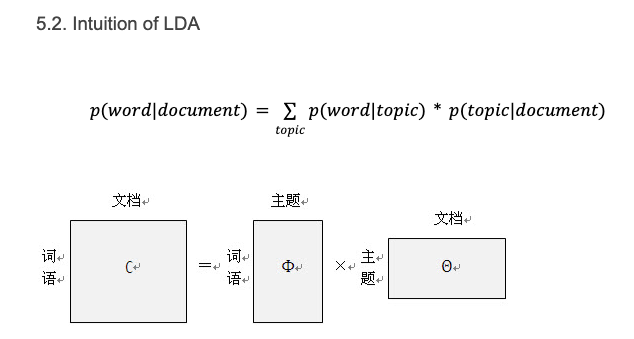

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
lda_1 = LatentDirichletAllocation(n_components = 5)
lda_2 = LatentDirichletAllocation(n_components = 6)
lda_3 = LatentDirichletAllocation(n_components = 7)


In [ ]:
lda_output_1 = lda_1.fit_transform(tfidf_matrix_1)
lda_output_2 = lda_2.fit_transform(tfidf_matrix_2)
lda_output_3 = lda_3.fit_transform(tfidf_matrix_3)


In [ ]:

print(lda_output_2.shape)
lda_output_2

(2000, 6)


array([[0.08333357, 0.08333354, 0.08333522, 0.08348353, 0.0833334 ,
        0.58318074],
       [0.08356284, 0.08364309, 0.58209663, 0.08353596, 0.08347792,
        0.08368357],
       [0.04036469, 0.04061897, 0.04016946, 0.04044165, 0.79814046,
        0.04026478],
       ...,
       [0.06904348, 0.06943793, 0.65382369, 0.06925266, 0.06939681,
        0.06904543],
       [0.07100508, 0.06998462, 0.64946754, 0.06937326, 0.07023391,
        0.06993559],
       [0.04628006, 0.0464077 , 0.04623143, 0.04689303, 0.04630358,
        0.76788421]])

Generate document with topic dataframe (matrix)

In [ ]:
 # column names
topic_names_1 = ["Topic" + str(i) for i in range(lda_1.n_components)]
topic_names_2 = ["Topic" + str(i) for i in range(lda_2.n_components)]
topic_names_3 = ["Topic" + str(i) for i in range(lda_3.n_components)]

# index names
doc_names_1 = ["Doc" + str(i) for i in range(len(data_1000))]
doc_names_2 = ["Doc" + str(i) for i in range(len(data_2000))]
doc_names_3 = ["Doc" + str(i) for i in range(len(data_10000))]


df_document_topic_1 = pd.DataFrame(np.round(lda_output_1, 3), columns=topic_names_1, index=doc_names_1)
df_document_topic_2 = pd.DataFrame(np.round(lda_output_2, 3), columns=topic_names_2, index=doc_names_2)
df_document_topic_3 = pd.DataFrame(np.round(lda_output_3, 3), columns=topic_names_3, index=doc_names_3)

# get dominant topic for each document
topic_1 = np.argmax(df_document_topic_1.values, axis=1)
df_document_topic_1['topic'] = topic_1


topic_2 = np.argmax(df_document_topic_2.values, axis=1)
df_document_topic_2['topic'] = topic_2

topic_3 = np.argmax(df_document_topic_3.values, axis=1)
df_document_topic_3['topic'] = topic_3

df_document_topic_1.head(10)

Topic0  Topic1  Topic2  Topic3  Topic4  topic
Doc0   0.060   0.061   0.060   0.310   0.509      4
Doc1   0.085   0.314   0.083   0.085   0.432      4
Doc2   0.200   0.200   0.200   0.200   0.200      0
Doc3   0.060   0.062   0.061   0.758   0.059      3
Doc4   0.486   0.039   0.040   0.397   0.039      0
Doc5   0.331   0.068   0.068   0.069   0.463      4
Doc6   0.064   0.064   0.743   0.064   0.066      2
Doc7   0.064   0.747   0.062   0.065   0.063      1
Doc8   0.197   0.045   0.046   0.667   0.045      3
Doc9   0.307   0.060   0.512   0.060   0.060      2

In [ ]:
print ("Document_topic 1:")
df_document_topic_1['topic'].value_counts()


Document_topic 1:


3    302
0    208
2    196
4    148
1    146
Name: topic, dtype: int64

In [ ]:
print ("Document_topic 2:")
df_document_topic_2['topic'].value_counts()


Document_topic 2:


4    728
5    319
0    273
1    237
3    232
2    211
Name: topic, dtype: int64

In [ ]:
print ("Document_topic 3:")
df_document_topic_3['topic'].value_counts()


Document_topic 3:


5    2438
4    2142
0    1328
1    1289
2    1207
6     849
3     747
Name: topic, dtype: int64

Generate topic Word dataframe (matrix)

In [ ]:
topic_word_1 = lda_1.components_
topic_word_2 = lda_2.components_
topic_word_3 = lda_3.components_
print(topic_word_1.shape)
print(topic_word_1)

(5, 245)
[[ 1.8965011   0.20481528  1.3073437  ...  0.20328228  0.20637204
   7.26988355]
 [ 1.55105937  0.20022321  0.20004738 ...  0.20306804  0.20077654
   0.35651156]
 [ 0.20075099  0.20026019  0.20083642 ...  0.20452236  0.20062163
   0.20174539]
 [ 1.17976961  0.20258979  1.59002033 ...  2.60335887 14.93174105
   3.51794588]
 [ 0.20090075  7.67349725  0.20007447 ...  3.72754793  0.20203453
   1.15166115]]


In [ ]:
df_topic_words_1 = pd.DataFrame(lda_1.components_, columns = tfidf_model_1.get_feature_names_out(), index = topic_names_1)
df_topic_words_2 = pd.DataFrame(lda_2.components_, columns = tfidf_model_2.get_feature_names_out(), index = topic_names_2)
df_topic_words_3 = pd.DataFrame(lda_3.components_, columns = tfidf_model_3.get_feature_names_out(), index = topic_names_3)

df_topic_words_1

abl   absolut     accur    actual    adjust     alarm   alreadi  \
Topic0  1.896501  0.204815  1.307344  0.200672  1.653346  2.388548  1.346242   
Topic1  1.551059  0.200223  0.200047  0.200237  0.200149  1.478610  0.201517   
Topic2  0.200751  0.200260  0.200836  0.200043  0.215437  1.457565  2.322191   
Topic3  1.179770  0.202590  1.590020  4.972803  3.902373  0.341189  1.671393   
Topic4  0.200901  7.673497  0.200074  0.206839  0.201405  0.201456  0.203508   

           alway      amaz    amazon  ...    weight      went       wife  \
Topic0  0.210354  0.202899  0.207264  ...  1.427914  2.039461   0.201694   
Topic1  0.200538  0.200597  1.787656  ...  1.211172  0.201789   0.200049   
Topic2  2.429735  0.201470  0.201176  ...  0.202131  0.200598  11.804034   
Topic3  1.772140  0.203410  3.263334  ...  2.597402  1.019116   0.203379   
Topic4  0.200080  9.930132  1.348692  ...  0.200897  0.200198   0.202706   

            wind      wish       work      worn     worth      wrist      year  
Topic0  0.205120  1.644613   8.992729  0.200567  0.203282   0.206372  7.269884  
Topic1  0.200931  0.200191  22.037130  0.200084  0.203068   0.200777  0.356512  
Topic2  0.202189  0.200189   0.203402  0.200025  0.204522   0.200622  0.201745  
Topic3  3.388891  1.147395   5.827003  3.335374  2.603359  14.931741  3.517946  
Topic4  0.201324  1.311368   2.147731  0.200321  3.727548   0.202035  1.151661  

[5 rows x 245 columns]

Print top weighted word in wach topic

In [ ]:
def print_topic_words(tfidf_model, lda, n_words):
    words = np.array(tfidf_model.get_feature_names_out())
    topic_words = []
    # for each topic, we have words weight
    for topic_words_weights in lda.components_:
        top_words = topic_words_weights.argsort()[::-1][:n_words]
        topic_words.append(words.take(top_words))
    df_topic_words = pd.DataFrame(topic_words, columns= ['Word '+str(i) for i in range(n_words)],
                                  index = ['Topic '+str(i) for i in range(lda.n_components)])

    return df_topic_words

print_topic_words(tfidf_model=tfidf_model_1, lda=lda_1, n_words=11)


Word 0  Word 1   Word 2  Word 3   Word 4  Word 5   Word 6  \
Topic 0     like    band  batteri     day    broke     use     work   
Topic 1     good    work     veri    time  product  seller  invicta   
Topic 2     nice   great     veri    look    excel   price     wife   
Topic 3  perfect    look     band    wear     face   wrist     time   
Topic 4     love  beauti     gift  awesom     amaz   thank     fast   

             Word 7    Word 8   Word 9    Word 10  
Topic 0        time      look     week       veri  
Topic 1  disappoint     month      doe       want  
Topic 2        love   product  qualiti  recommend  
Topic 3      expect       fit     veri        big  
Topic 4     absolut  deliveri   realli     bought

In [ ]:
print_topic_words(tfidf_model=tfidf_model_2, lda=lda_2, n_words=11)

Word 0  Word 1     Word 2 Word 3 Word 4     Word 5      Word 6  \
Topic 0     nice    veri  veri nice   love   gift       look     perfect   
Topic 1    excel    time        big  great   look      thing      becaus   
Topic 2    great  beauti       work   love   year      price        easi   
Topic 3     love    good  veri good   veri    son      broke        time   
Topic 4     band    look       time   like   veri      wrist        hand   
Topic 5  qualiti   price       look   veri   high  recommend  compliment   

              Word 7  Word 8  Word 9 Word 10  
Topic 0         like   happi   thank   color  
Topic 1          bad    easi    veri     use  
Topic 2  great price  expect     old    veri  
Topic 3         look    work     buy   chang  
Topic 4          use   light    onli  replac  
Topic 5        great    good  awesom    love

In [ ]:
print_topic_words(tfidf_model=tfidf_model_3, lda=lda_3, n_words=11)

Word 0 Word 1     Word 2     Word 3     Word 4   Word 5     Word 6  \
Topic 0   love  excel       gift     beauti     bought  husband       wife   
Topic 1   easi   read      color       time       face    light  easi read   
Topic 2   good  great      price       look    qualiti     like    product   
Topic 3   veri   nice  veri nice  veri good       good  perfect       cute   
Topic 4   band  wrist       look       like       veri    small        fit   
Topic 5   work   time    batteri        day        use      set       like   
Topic 6   high   wear       year      pleas  recommend       ok       veri   

              Word 7      Word 8          Word 9       Word 10  
Topic 0     christma    daughter         absolut         great  
Topic 1         look        love            veri          like  
Topic 2  great price      expect           thank  good qualiti  
Topic 3        happi  veri happi          classi          look  
Topic 4        strap        size           great           big  
Topic 5        month        onli          replac          look  
Topic 6        great    everyday  high recommend    veri pleas

## Part 6: Optimal classify

### Part 6.1 Kmeans Optimal part

In [ ]:
optim_num_clusters_1 = 4

optim_km_1 = KMeans(n_clusters = optim_num_clusters_1)
optim_km_1.fit(tfidf_matrix_1)

optim_clusters_1 = optim_km_1.labels_.tolist()

optim_product_1 = { 'review': watch_df[:1000].review_body, 'cluster': optim_clusters_1}

optim_frame_1 = pd.DataFrame(optim_product_1, columns = ['review', 'cluster'])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
print ("Optim Frame 1 Num Revies distribution")
optim_frame_1["cluster"].value_counts()



Optim Frame 1 Num Revies distribution


0    652
3    182
2     87
1     79
Name: cluster, dtype: int64

In [ ]:



kmeans_result_output(optim_km_1, optim_num_clusters_1, tdidf_words_1, optim_frame_1)

Cluster 0 words:look,like,veri,band,work,time,perfect,beauti,use,great,excel,realli,
Cluster 0 reviews: 652 reviews : 
Scratches, It works well on me. However, I found cheaper prices in other places after making the purchase, Beautiful watch face.  The band looks nice all around.  The links do make that squeaky cheapo noise when you swing it back and forth on your wrist which can be embarrassing in front of watch enthusiasts.  However, to the naked eye from afar, you can't tell the links are cheap or folded because it is well polished and brushed and the folds are pretty tight for the most part.<br /><br />I love the new member of my collection and it looks great.  I've had it for about a week and so far it has kept good time despite day 1 which is typical of a new mechanical watch, I was about to buy this thinking it was a Swiss Army Infantry watch-- the description uses the words infantry and army--- when I realized it must be a fraud for $12.00. This should not be offered on Amazon-

### Part 6.2 LDA Optimal part

In [ ]:
optim_lda_1 = LatentDirichletAllocation(n_components = 4)
optim_lda_output_1 = optim_lda_1.fit_transform(tfidf_matrix_1)
optim_topic_names_1 = ["Topic" + str(i) for i in range(optim_lda_1.n_components)]
optim_doc_names_1 = ["Doc" + str(i) for i in range(len(data_1000))]
optim_df_document_topic_1 = pd.DataFrame(np.round(optim_lda_output_1, 3), columns=optim_topic_names_1, index=optim_doc_names_1)
optim_df_document_topic_1.head(10)

Topic0  Topic1  Topic2  Topic3
Doc0   0.077   0.078   0.543   0.302
Doc1   0.384   0.107   0.110   0.399
Doc2   0.250   0.250   0.250   0.250
Doc3   0.747   0.076   0.075   0.101
Doc4   0.296   0.431   0.223   0.051
Doc5   0.291   0.087   0.089   0.534
Doc6   0.083   0.721   0.081   0.114
Doc7   0.080   0.079   0.762   0.078
Doc8   0.057   0.827   0.058   0.058
Doc9   0.077   0.078   0.767   0.078

In [ ]:
optim_topic_1 = np.argmax(optim_df_document_topic_1.values, axis=1)
optim_df_document_topic_1['topic'] = topic_1

optim_df_document_topic_1.head(10)

Topic0  Topic1  Topic2  Topic3  topic
Doc0   0.077   0.078   0.543   0.302      4
Doc1   0.384   0.107   0.110   0.399      4
Doc2   0.250   0.250   0.250   0.250      0
Doc3   0.747   0.076   0.075   0.101      3
Doc4   0.296   0.431   0.223   0.051      0
Doc5   0.291   0.087   0.089   0.534      4
Doc6   0.083   0.721   0.081   0.114      2
Doc7   0.080   0.079   0.762   0.078      1
Doc8   0.057   0.827   0.058   0.058      3
Doc9   0.077   0.078   0.767   0.078      2

In [ ]:
print ("Optim Document_topic 1:")
optim_df_document_topic_1['topic'].value_counts()


Optim Document_topic 1:


3    302
0    208
2    196
4    148
1    146
Name: topic, dtype: int64

In [ ]:
optim_topic_word_1 = lda_1.components_
optim_topic_word_1

array([[ 1.8965011 ,  0.20481528,  1.3073437 , ...,  0.20328228,
         0.20637204,  7.26988355],
       [ 1.55105937,  0.20022321,  0.20004738, ...,  0.20306804,
         0.20077654,  0.35651156],
       [ 0.20075099,  0.20026019,  0.20083642, ...,  0.20452236,
         0.20062163,  0.20174539],
       [ 1.17976961,  0.20258979,  1.59002033, ...,  2.60335887,
        14.93174105,  3.51794588],
       [ 0.20090075,  7.67349725,  0.20007447, ...,  3.72754793,
         0.20203453,  1.15166115]])

In [ ]:
optim_df_topic_words_1 = pd.DataFrame(optim_lda_1.components_, columns = tfidf_model_1.get_feature_names_out(), index = optim_topic_names_1)

In [ ]:
optim_LDA_table = print_topic_words(tfidf_model=tfidf_model_1, lda=optim_lda_1, n_words=15)
optim_LDA_table

Word 0 Word 1 Word 2     Word 3   Word 4   Word 5  Word 6 Word 7  \
Topic 0    nice   veri   good       time   expect    price  awesom   look   
Topic 1   great   good   like       look  perfect     band     big  color   
Topic 2  beauti   gift  month  recommend      use  qualiti     day   year   
Topic 3    love   work  excel       amaz  product  husband     got   fast   

        Word 8  Word 9  Word 10 Word 11 Word 12  Word 13 Word 14  
Topic 0   band  realli  product   order  seller  qualiti  return  
Topic 1  light    wear      fit    veri    face    wrist   littl  
Topic 2  great    time     look   water   simpl   design    high  
Topic 3   veri    stop  absolut    week     bit   bought     tri

## Part 7: Analyze topic through the business lens


Below topic analyze is based on my personal analysis, it is a human identify process.

Kmeans model tiopic Analysis



Cluster 0： **Praise review** words:look,like,veri,band,work,time,perfect,beauti,use,great,excel,realli,

luster 1: **Praise review** words:nice,veri,price,look,simpl,realli,time,good,work,seller,great,expect,

Cluster 2:**Quality review** words:good,veri,product,qualiti,price,look,seller,work,excel,great,love,valu,

Cluster 3: **Gift/family purpose review** words:love,wife,look,husband,beauti,absolut,great,gift,veri,color,bought,son,

In [ ]:
topics_analysis = ["Price/Returned customers", "Praise review", "Quality Review","Love/Couples review"]
optim_LDA_table.index=topics_analysis

optim_LDA_table

Word 0 Word 1 Word 2     Word 3   Word 4   Word 5  \
Price/Returned customers    nice   veri   good       time   expect    price   
Praise review              great   good   like       look  perfect     band   
Quality Review            beauti   gift  month  recommend      use  qualiti   
Love/Couples review         love   work  excel       amaz  product  husband   

                          Word 6 Word 7 Word 8  Word 9  Word 10 Word 11  \
Price/Returned customers  awesom   look   band  realli  product   order   
Praise review                big  color  light    wear      fit    veri   
Quality Review               day   year  great    time     look   water   
Love/Couples review          got   fast   veri    stop  absolut    week   

                         Word 12  Word 13 Word 14  
Price/Returned customers  seller  qualiti  return  
Praise review               face    wrist   littl  
Quality Review             simpl   design    high  
Love/Couples review          bit   bought     tri